# 用一行代码创建网格：plt.subplots

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
%matplotlib inline
plt.style.use('seaborn-white')

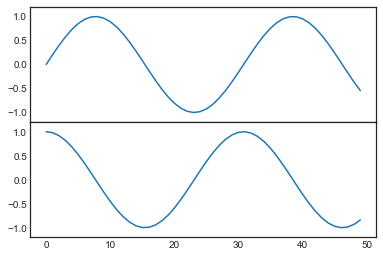

In [2]:
fig = plt.figure()
ax1 = fig.add_axes([0.1, 
                    0.5, 
                    0.8, 
                    0.4],
                   
                   xticklabels=[], 
                   ylim=(-1.2, 1.2))

ax2 = fig.add_axes([0.1, 
                    0.1, 
                    0.8, 
                    0.4],
                   
                   ylim = (-1.2, 1.2))

x = np.linspace(0, 10)
ax1.plot(np.sin(x))
ax2.plot(np.cos(x))
plt.savefig(r"D:\Python-Excel\Data-analysis\Python-Data-Science\Objects\Matplotlib\images\figure.jpg")

In [ ]:
## plt.subplot:简易网格子图

In [ ]:
若干彼此对齐的行列子图是常见的可视化任务，Matplotlib拥有一些可以轻松创建它们的简便方法。
最底层的方法是用plt.subplot()在一个网格中创建一个子图。这个命令有三个整型参数——将要
创建的网格 子图行数、列数和索引值，索引值从1开始，从左上角到右下角依次增大。

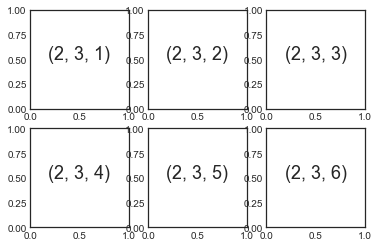

In [3]:
for i in range(1, 7):
    plt.subplot(2, 3, i)
    plt.text(0.5, 0.5, 
             str((2, 3, i)
                ), 
             fontsize=18, ha='center')

In [ ]:
 plt.subplots_adjust命令可以调整子图之间的间隔。用面向对象接口的命令fig,add_subplot()
可以取得同样的效果，示例代码如下：

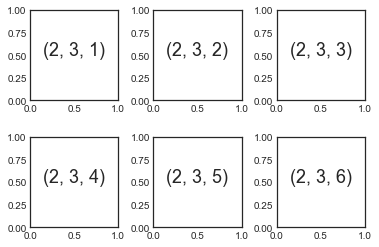

In [4]:
fig = plt.figure()
fig.subplots_adjust(hspace=0.4, 
                    wspace=0.4)

for i in range(1, 7):
    ax = fig.add_subplot(2, 3, i)
    ax.text(0.5, 
            0.5, 
            str((2, 3, i)
               ),
            
            fontsize=18, ha='center')
plt.savefig(r"D:\Python-Excel\Data-analysis\Python-Data-Science\Objects\Matplotlib\images\figure2.jpg")

In [ ]:
当你打算创建一个大型网格子图时，就没办法使用前面那种亦步亦趋的方法，尤其是当你想隐藏
内部子图的x轴与y轴标题时。出于这一需求，plt.subplots()实现了你想要的功能（需要注意的是
此处subplots结尾多了个s）。这个函数不是用来创建单个子图的，而是用一行代码创建多个子图，
并返回一个包含子图的NumPy数组。关键参数是行数与列数，以及可选参数sharex与sharey，通过
它们可以设置不同子图之间的关联关系。下面我们将创建一个2*3网格子图，每行的2个子图使用相同
的y轴坐标，每列的2个子图使用相同的x轴坐标，代码如下：

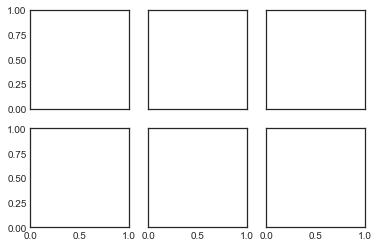

In [5]:
# 确定网格中的子图
fig, ax = plt.subplots(2, 3, 
                       sharex='col', 
                       sharey='row')

In [ ]:
设置sharex与shaery参数之后，我们就可以自动去掉网格内部子图的标签，让图形看起来更整洁。
坐标轴实例网络的返回结果是一个NumPy数组，这样就可以通过标准的数组取值方式轻松获取想要的
坐标轴。

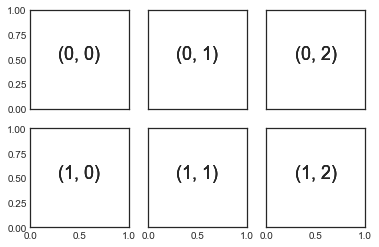

In [13]:
# 坐标轴存放在一个NumPy数组中，按照[row, col]取值
for i in range(2):
    for j in range(3):
        ax[i, j].text(0.5, 0.5, str((i, j)), fontsize=18, ha='center')
fig

In [ ]:
## plt.GridSpec:实现更复杂的排列方式

In [ ]:
如果想实现不规则的多行多列子图网格，plt.GridSpec()是最好的工具。plt.GridSpec()对象本身
不能直接创建一个图形，它只是plt.subplot()命令可以识别的简易接口。例如，一个带行列间距的
2*3网格的配置代码，示例如下：

In [14]:
grid = plt.GridSpec(2, 3, wspace=0.4, hspace=0.3)

In [ ]:
通过类似python切片的语法设置子图的位置和扩展尺寸显示出来

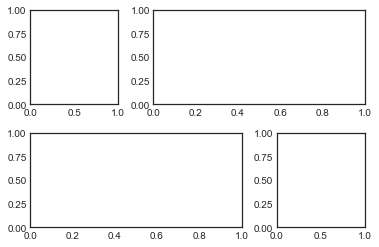

In [15]:
# 用plt.GridSpec生成不规则子图
plt.subplot(grid[0, 0])
plt.subplot(grid[0, 1:])
plt.subplot(grid[1, :2])
plt.subplot(grid[1, 2]);

In [ ]:
## 多轴频次直方图

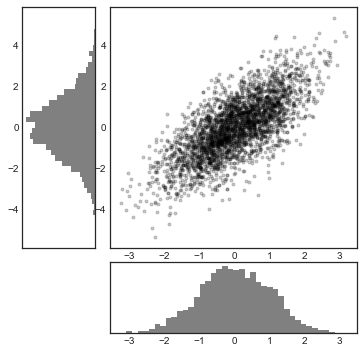

In [6]:
# 创建一些正态分布数据
mean = [0, 0]
cov = [
    [1, 1], 
    [1, 2]
]
x, y = np.random.multivariate_normal(mean, cov, 3000).T

# 设置坐标轴和网格配置方式
fig = plt.figure(figsize=(6, 6))
grid = plt.GridSpec(4, 
                    4, 
                    hspace=0.2, 
                    wspace=0.2)

main_ax = fig.add_subplot(grid[:-1, 1:])
y_hist = fig.add_subplot(grid[:-1, 0], 
                         xticklabels=[], 
                         sharey=main_ax)

x_hist = fig.add_subplot(grid[-1, 1:], 
                         yticklabels=[], 
                         sharex=main_ax)

# 主坐标轴画散点图
main_ax.plot(x, 
             y, 
             'ok', 
             markersize=3, 
             alpha=0.2)

# 次坐标轴画频次直方图
x_hist.hist(x, 
            40, 
            histtype='stepfilled', 
            orientation='vertical', 
            color='gray')

y_hist.hist(y, 
            40, 
            histtype='stepfilled', 
            orientation='horizontal', 
            color='gray')

y_hist.invert_xaxis()
plt.savefig(r"D:\Python-Excel\Data-analysis\Python-Data-Science\Objects\Matplotlib\images\gridspec.jpg")